# Who tweeted at @realDonaldTrump the most (20201225 - 20210114)?

We're using a Jupyter Notebook via the [Anaconda distribution](https://www.anaconda.com/), and we'll need to only import the following:

In [3]:
import re
import pandas as pd

We'll create a DataFrame to work with from `202101-users.txt`. This file is a derivative of the [Tweets to Donald Trump (@realDonaldTrump)](https://doi.org/10.5683/SP/8BAVQM) dataset. It can be created with the [`users.py`](https://github.com/DocNow/twarc/blob/master/utils/users.py):


```
$ python twarc/utils/users.py 202101-tweets.jsonl > 202101-users.txt
```

It is also included in the repo in the `data` directory.

This `users.py` script outputs the data in the format: `"%s [%s]"` (`user name`, `[user handle]`). So, we have lines that look like this:

```
RACISM IS ARROGANT [Dangerangel]
AirManXXXX [air_xxxx]
Gin-Trump-2021 America Turned The Map Bloody Red! [GinGinnele11]
Zanne [Zanne82540208]
Gin-Trump-2021 America Turned The Map Bloody Red! [GinGinnele11]
Grant Wakefield [GrantWakefield4]
Gin-Trump-2021 America Turned The Map Bloody Red! [GinGinnele11]
Kevin B - Truth, News, and Hidden Secrets Revealed [KevinBe47715193]
FLASH [FLASH56005495]
Miss Behaved [theholyanarchy]
```

We can load these in as single column, and split them into two columns later.


In [4]:
users = pd.read_csv(
    "data/202101-users.txt",
    names=["username-handle"],
    header=None,
    encoding='utf8',
)

Let's take a look at the DataFrame:

In [5]:
users

,username-handle
0,DonnaB [DonnaB31925835]
1,Steve Johnson [Sandiegosteve55]
2,I'm Stuck [ImStuck11]
3,Dr. Tacos [TacosTruth]
4,۫ͫ̈́̊̃͛͐̎̂̓̃̇ .Ymtise [Ymtise36]
...,...
5307029,Grant Wakefield [GrantWakefield4]
5307030,Gin-Trump-2021 America Turned The Map Bloody R...
5307031,Kevin B - Truth
5307032,FLASH [FLASH56005495]


Now let's split `username-handle` into separate columns using a regualr expression that extracts the value between the brackets.

In [6]:
users['handle'] = users['username-handle'].str.extract('\[(.*?)\]', expand=True)

Let's look at the DataFrame again to see our new column.

In [7]:
users

,username-handle,handle
0,DonnaB [DonnaB31925835],DonnaB31925835
1,Steve Johnson [Sandiegosteve55],Sandiegosteve55
2,I'm Stuck [ImStuck11],ImStuck11
3,Dr. Tacos [TacosTruth],TacosTruth
4,۫ͫ̈́̊̃͛͐̎̂̓̃̇ .Ymtise [Ymtise36],Ymtise36
...,...,...
5307029,Grant Wakefield [GrantWakefield4],GrantWakefield4
5307030,Gin-Trump-2021 America Turned The Map Bloody R...,GinGinnele11
5307031,Kevin B - Truth,NaN
5307032,FLASH [FLASH56005495],FLASH56005495


Now that we have the Twitter handle, let's find out who the most profilic Tweeters are for #elxn43. The `value_counts()` method comes in handy here.

In [8]:
top_tweeters = users['handle'].value_counts().head(20)
top_tweeters

DJTMentionsBot     3070
TuskBot            2649
MImproxyble        2130
TheWondersNatur    2129
mathluxenburg      1934
lucasfrance151     1772
KathyEl12345       1665
BKK77943793        1568
ASN86546890        1508
marcoscsleite      1448
ponytail122        1440
natemax            1399
studio1964         1359
Tony201713         1197
Th16091749Carol    1125
HRHAdeyemiAdams    1111
the_alwaysreal     1093
Randyluv3          1031
GaylaMcGill5       1021
Erla77506124       1004
Name: handle, dtype: int64

Now let's plot them!

Let's also do a colour gradient for the bars to get some color separation.

Here we'll create the chart, then add a title, and labels.

Text(0, 0.5, 'Count')

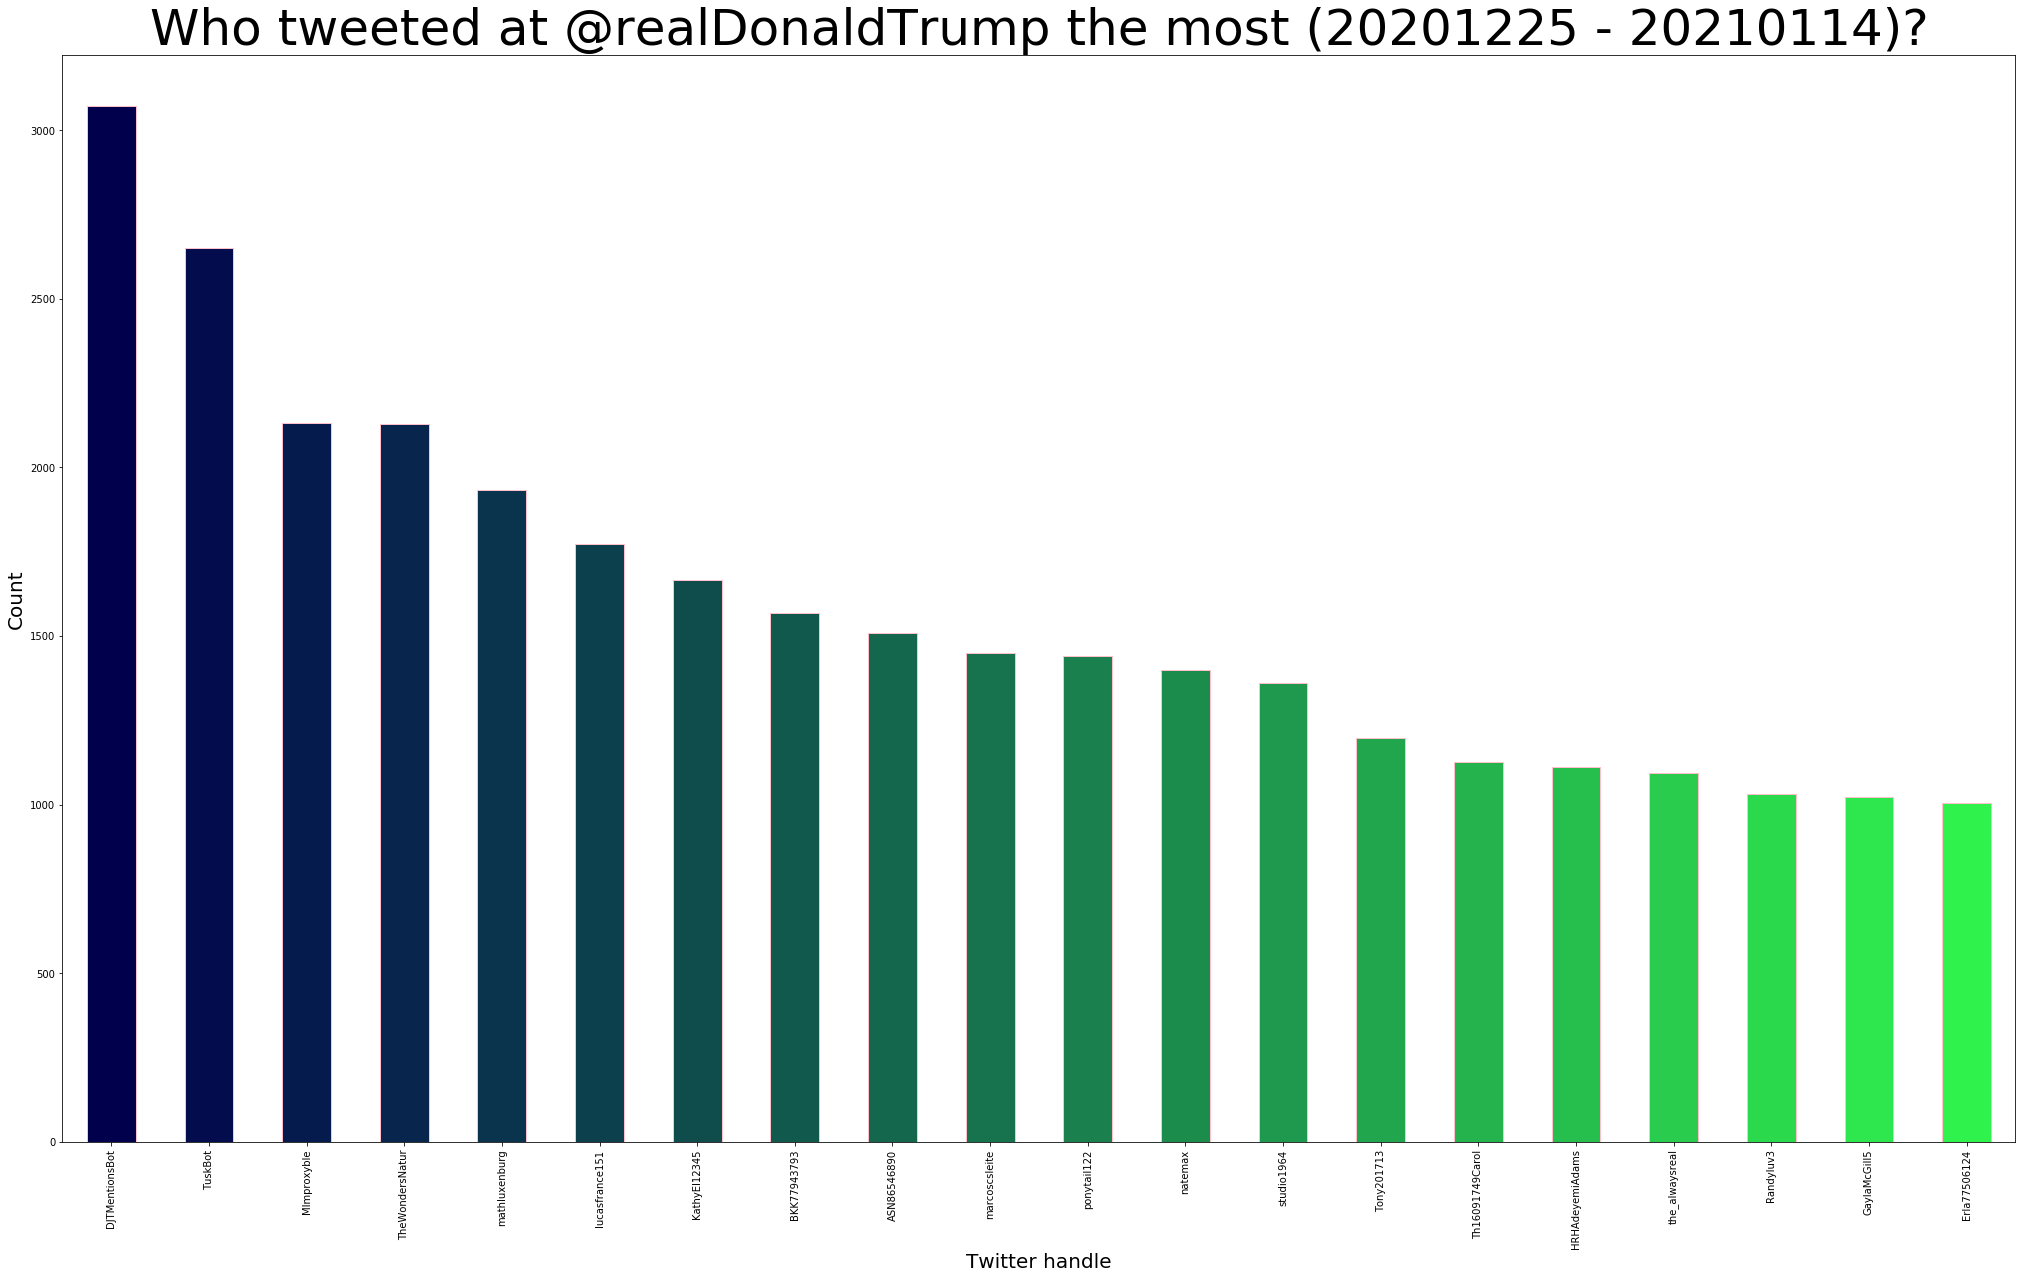

In [11]:
colours = [(x / 100.0, x / 20.0, 0.30) for x in range(len(top_tweeters))]

chart = top_tweeters.plot.bar(
    color=colours,
    figsize=(35, 20),
    legend=False,
    edgecolor="pink",
)

chart.set_title("Who tweeted at @realDonaldTrump the most (20201225 - 20210114)?", fontsize=50)
chart.set_xlabel("Twitter handle", fontsize=20)
chart.set_ylabel("Count", fontsize=20)